In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking 


import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['DataSF Data Dictionary for Air Traffic Passenger Statistics.pdf', 'DataSF Data Dictionary for Air Traffic LANDINGS Statistics.pdf', 'landings_9 (2)', 'air-traffic-passenger-statistics.csv', 'socrata_metadata_air-traffic-passenger-statistics.json', 'socrata_metadata_air-traffic-landings-statistics.json', 'air-traffic-landings-statistics.csv']


In [36]:
df=pd.read_csv('../input/air-traffic-landings-statistics.csv')
dp=pd.read_csv('../input/air-traffic-passenger-statistics.csv')

Let's take a quick look at what the data's looks like:
1. dataframe Landing 
2. dataframe passenger 

In [37]:
df.head()


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000
2,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,27,9666000
3,200204,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946
4,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000


In [38]:
dp.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


Here can you see the correlations between the columns:,
1 (dataframe landing) there is small correlation between 'Landing Count' en 'Total Landed Weight.
2 (dataframe passenger) there is no correlation between the columns.

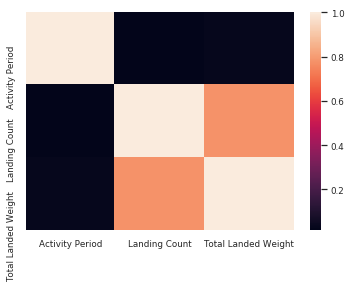

In [39]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

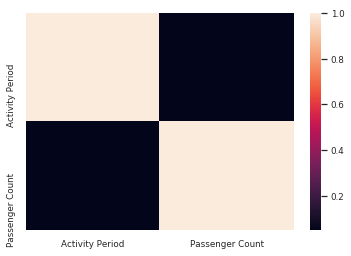

In [40]:
corr=dp.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [41]:
#create new Columns from the column 'Activity Period' to 'year' and 'month'
df.loc[:,"date"] = pd.to_datetime(df.loc[:,"Activity Period"].astype(str),format="%Y%m")
df.loc[:,"year"] = df["date"].dt.year
df.loc[:,"month"] = df["date"].dt.month
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,date,year,month
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000,2002-04-01,2002,4
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000,2002-04-01,2002,4
2,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,27,9666000,2002-04-01,2002,4
3,200204,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946,2002-04-01,2002,4
4,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000,2002-04-01,2002,4


Dataset is a combination of the two dataframes 'landing' and 'passenger'

In [43]:
sf=pd.merge(left=df, right=dp, on="Operating Airline", how="outer")
sf.head()

,Activity Period_x,Operating Airline,Operating Airline IATA Code_x,Published Airline_x,Published Airline IATA Code_x,GEO Summary_x,GEO Region_x,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,date,year,month,Activity Period_y,Operating Airline IATA Code_y,Published Airline_y,Published Airline IATA Code_y,GEO Summary_y,GEO Region_y,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000,2002-04-01,2002,4,200507.0,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271.0
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000,2002-04-01,2002,4,200507.0,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131.0
2,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000,2002-04-01,2002,4,200507.0,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415.0
3,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000,2002-04-01,2002,4,200508.0,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27472.0
4,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000,2002-04-01,2002,4,200508.0,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,26535.0


Simple Heatmap, values of landing count per year and month**(dataframe landing)

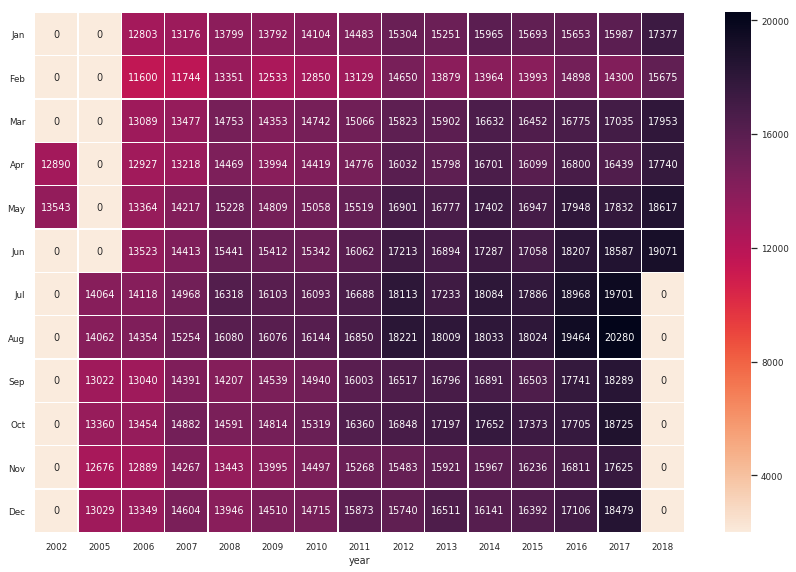

In [53]:
df1 = df.groupby(['year','month'])['Landing Count'].sum().round()
df1 = df1.reset_index()

pivot_1 = df1.pivot_table(values='Landing Count',index='month',columns='year', fill_value=0)
pivot_1.index=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

sns.set(font_scale=0.8)
fig = plt.figure(figsize=(12,8))
g = sns.heatmap(pivot_1, annot=True, linewidths=.5, fmt="d", square =True, vmin=2000, cmap=sns.cm.rocket_r)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.tight_layout()

Simple Heatmap, values of passenger count per year and month (dataframe Passanger)

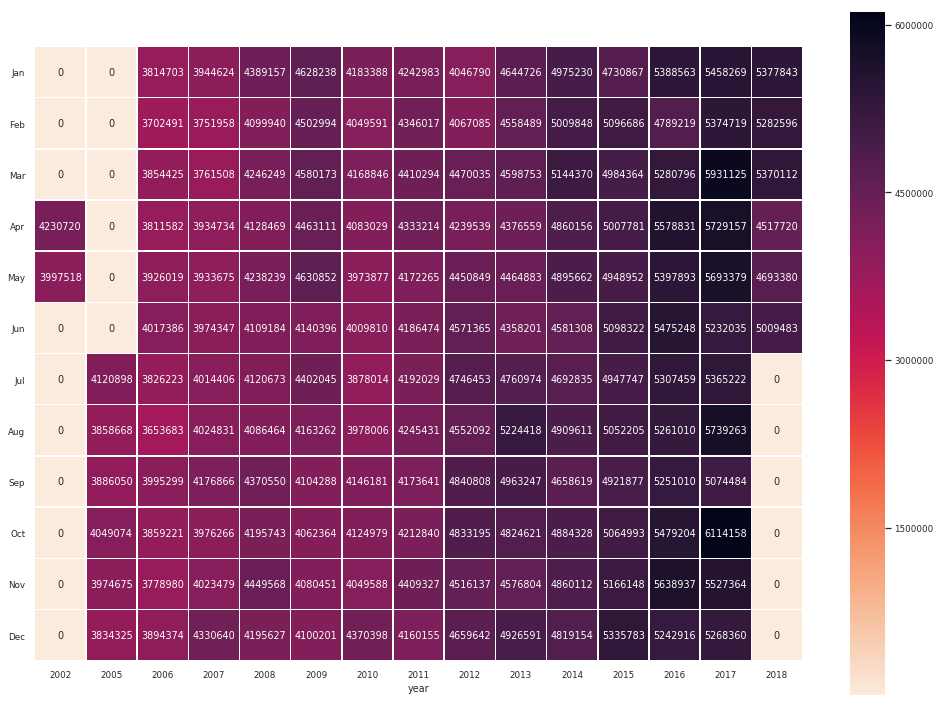

In [54]:
sf3 = sf.groupby(['year','month'])['Passenger Count'].sum().divide(1000).round()
sf3 = sf3.reset_index()

pivot_3 = sf3.pivot_table(values='Passenger Count',index='month',columns='year', fill_value=0)
pivot_3.index=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

sns.set(font_scale=0.8)
fig = plt.figure(figsize=(14,10))
g = sns.heatmap(pivot_3, annot=True, linewidths=.5, fmt="d", square =True, vmin=2000, cmap=sns.cm.rocket_r)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.tight_layout()

GEO regions to total traffic generated

In [ ]:
sf1= sf.groupby(["year","GEO Region_y"])["Passenger Count"].sum()
sf1 = sf1.reset_index()

pivot_2 = sf1.pivot_table(values="Passenger Count",index="year",columns="GEO Region_y", fill_value=0)
pivot_2 = pivot_2.drop("US",axis=1)
pivot_2["Total"] = pivot_2.sum(axis=1)

for col in pivot_2.columns[:-1]:
        pivot_2["Share " + str(col)]=pivot_2[col]/pivot_5["Total"]

ratios_2 = pivot_2.iloc[:,-8:]
ratios_2.plot(figsize=(12,8), title='GEO regions to total traffic generated')

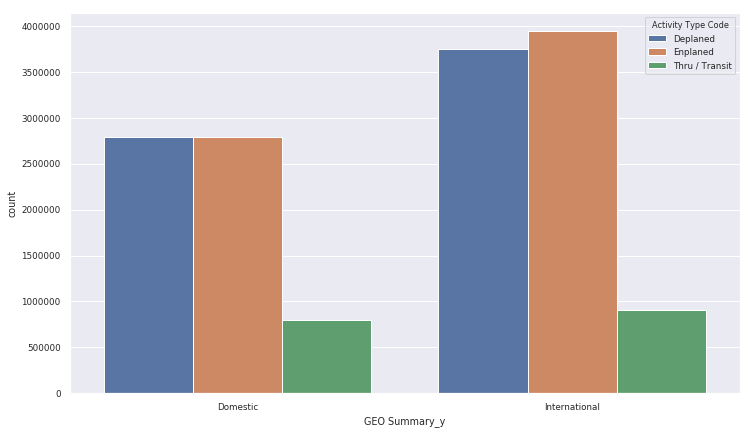

In [45]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(sf['GEO Summary_y'],hue=sf['Activity Type Code'])


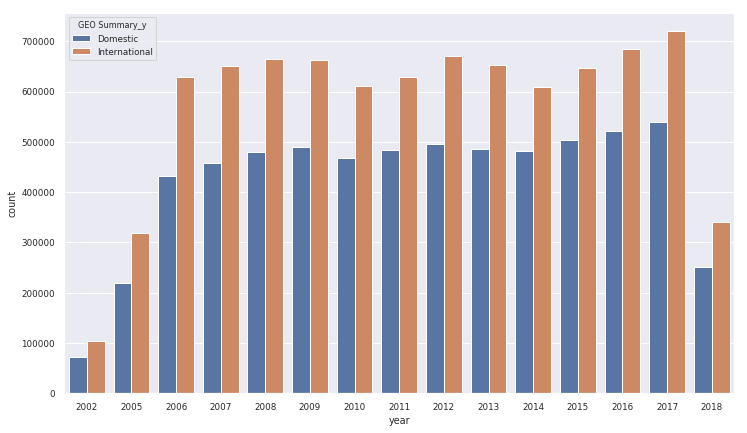

In [46]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(sf['year'],hue=sf['GEO Summary_y'])


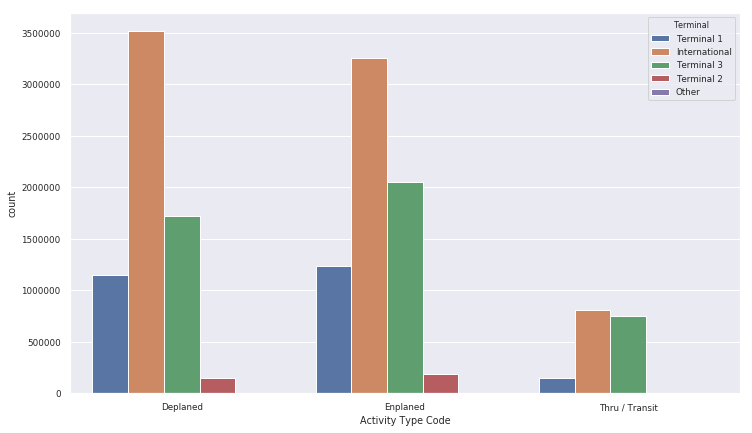

In [47]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(sf['Activity Type Code'],hue=sf['Terminal'])


Useful information 

In [61]:
sf1=sf.drop(['Activity Period_x','year','month','Activity Period_y'],axis=1)
sf1.describe()

,Landing Count,Total Landed Weight,Passenger Count
count,1.497896e+07,1.497896e+07,1.497761e+07
mean,1.717775e+02,2.740294e+07,4.795766e+04
std,3.210022e+02,4.108799e+07,8.811288e+04
min,1.000000e+00,6.850000e+03,1.000000e+00
25%,2.100000e+01,3.680000e+06,5.575000e+03
50%,4.200000e+01,1.188640e+07,1.267000e+04
75%,1.340000e+02,3.168000e+07,4.807000e+04
max,2.245000e+03,2.730420e+08,6.598370e+05
